In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./breast_cancer_data-master/data.csv')

#pd.set_option('display.max_columns', None)
#print(df.describe())
#print(df.columns)
#df.head(10)

features_mean = list(df.columns[2:12])
features_se = list(df.columns[12:22])
features_worst = list(df.columns[22:])

df.drop("id", axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
#df.head()

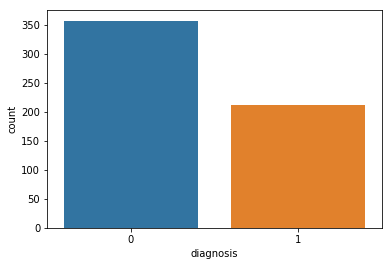

In [52]:
sns.countplot(df['diagnosis'])
#plt.show()

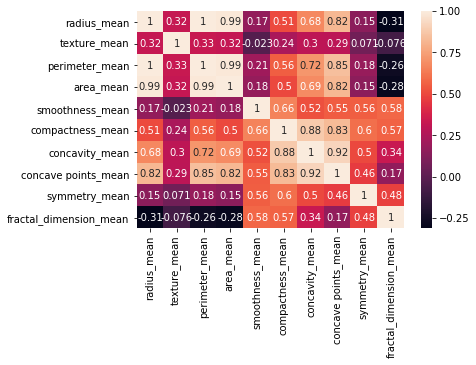

In [57]:
corr = df[features_mean].corr()
#plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features_remain = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']

X = df[features_remain]
y = df['diagnosis']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("准确率: ", accuracy_score(prediction, y_test))


准确率:  0.9181286549707602
